In [24]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_percentage_error
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression, Ridge,Lasso
from xgboost import XGBRegressor
from pathlib import Path

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('BMIProject/'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

## importing file

In [25]:
cwd_path = os.getcwd()
one_top = Path(cwd_path).parent
print(one_top)
file_path = one_top.joinpath("data","csv", "bmi.csv")
print(file_path)
df=pd.read_csv(file_path)
df.head()

d:\WorkSpace\BMIProject
d:\WorkSpace\BMIProject\data\csv\bmi.csv


,Gender,Height,Weight,Index
0,Male,174,96,4
1,Male,189,87,2
2,Female,185,110,4
3,Female,195,104,3
4,Male,149,61,3


## Pre-Processing & Data Cleaning

In [26]:
df.info()
## dataset contain 1 cat variable and 3 num variables, no null data or missing values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Gender  500 non-null    object
 1   Height  500 non-null    int64 
 2   Weight  500 non-null    int64 
 3   Index   500 non-null    int64 
dtypes: int64(3), object(1)
memory usage: 15.8+ KB


In [27]:
df.describe()
## target variable Index is numeric but it actually depicts categories of BMI

,Height,Weight,Index
count,500.000000,500.000000,500.000000
mean,169.944000,106.000000,3.748000
std,16.375261,32.382607,1.355053
min,140.000000,50.000000,0.000000
25%,156.000000,80.000000,3.000000
50%,170.500000,106.000000,4.000000
75%,184.000000,136.000000,5.000000
max,199.000000,160.000000,5.000000


<Axes: xlabel='Gender'>

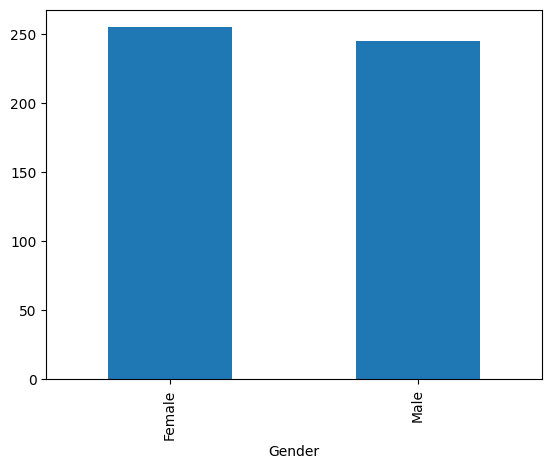

In [28]:
df['Gender'].value_counts().plot(kind='bar')

#Male and Female datapointa are roughly in equal proportions

## BMI Formula 



**weight (kg) / (height (m) x height (m))**

**weight (kg) / (height (cm) x height (cm)) x 10,000**

***1 cm = 0.393 inch***

***1 kg = 2.204 lb***

**Index :
0 - Extremely Weak,
1 - Weak,
2 - Normal,
3 - Overweight,
4 - Obesity,
5 - Extreme Obesity**

**Classification	BMI range - kg/m2**

**Severe Thinness	< 16     - Extremely Weak**

**Moderate Thinness	16 - 17  - Extremely Weak**

**Mild Thinness	17 - 18.5    - Weak**

**Normal	18.5 - 25        - Normal**

**Overweight	25 - 30      - Overweight**

**Obese 	   30  - 35      - Obesity**

**Obese 	> 35             - Extreme Obesity**

## Visualizations

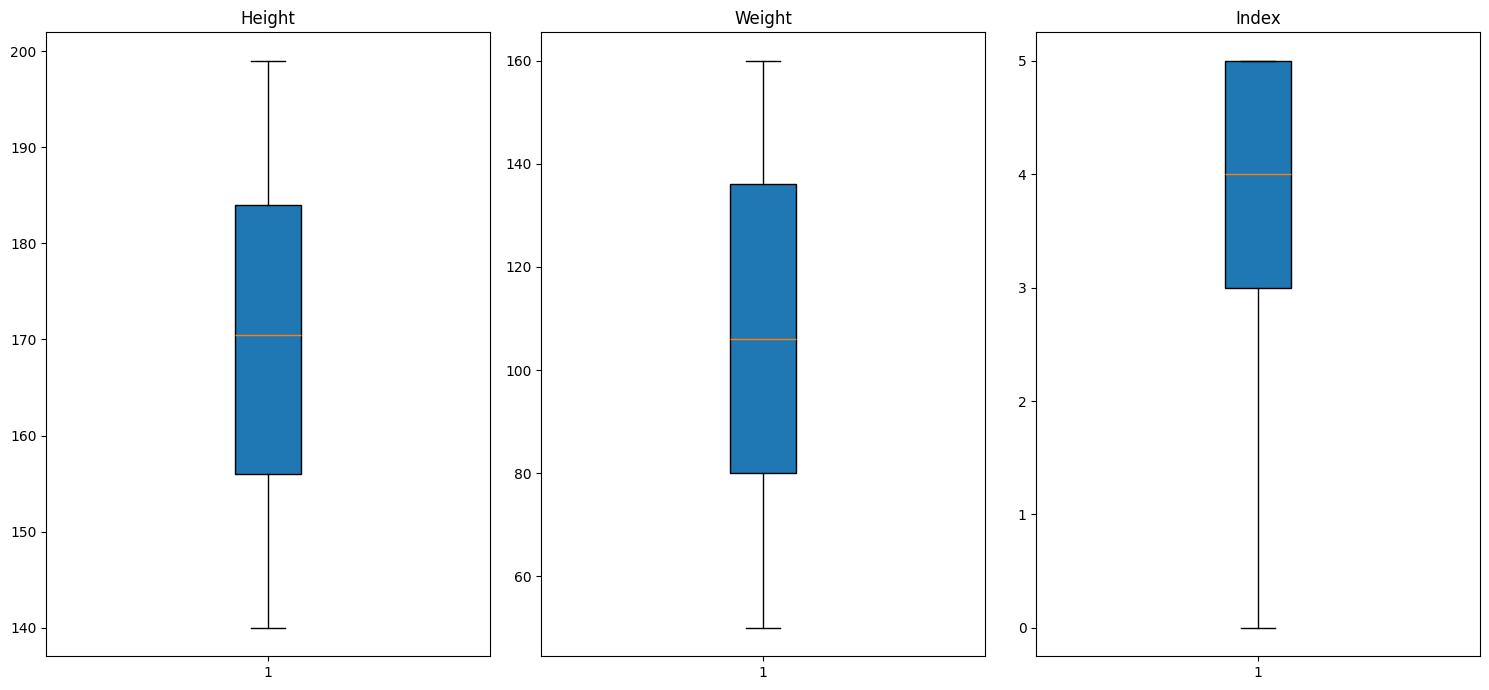

In [29]:
cat_columns = df.select_dtypes(include=['object']).columns
numeric_columns = df.select_dtypes(exclude=['object']).columns

##ploting
fig, axs = plt.subplots(1,len(numeric_columns), figsize=(15,7))

for i,column in enumerate(numeric_columns):
    
    axs[i].boxplot(df[column],patch_artist=True)
    axs[i].set_title(column)
    

fig.tight_layout() 
plt.show()

## Transformation

In [30]:
numeric_columns = numeric_columns.drop('Index')


In [31]:
numeric_columns, cat_columns

(Index(['Height', 'Weight'], dtype='object'),
 Index(['Gender'], dtype='object'))

In [32]:
num_transformer = StandardScaler()
cat_transformer = OneHotEncoder()

col_transformer = ColumnTransformer(
transformers = [
            ('num_transform',num_transformer,numeric_columns),
            ('cat_transform',cat_transformer,cat_columns)
]
)

In [33]:
Y = df['Index']
X=df.drop(columns='Index',axis=1)
X.head(),Y.head()

(   Gender  Height  Weight
 0    Male     174      96
 1    Male     189      87
 2  Female     185     110
 3  Female     195     104
 4    Male     149      61,
 0    4
 1    2
 2    4
 3    3
 4    3
 Name: Index, dtype: int64)

In [34]:
## transforming X
X = col_transformer.fit_transform(X)


In [35]:
X.shape

(500, 4)

## Splitting Dataset

In [36]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.3,random_state=43)

## Training with different models

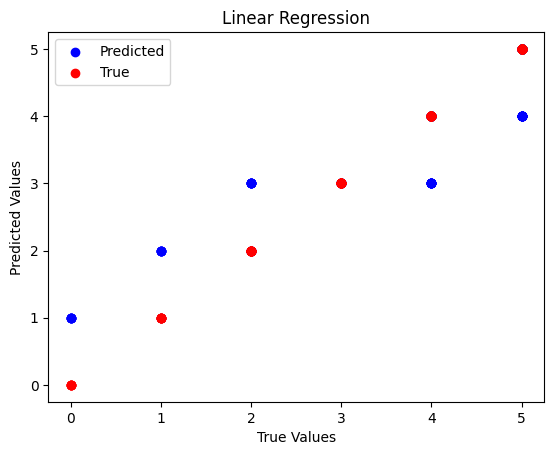

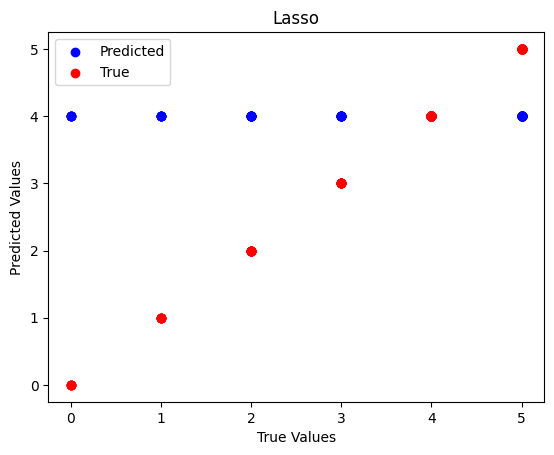

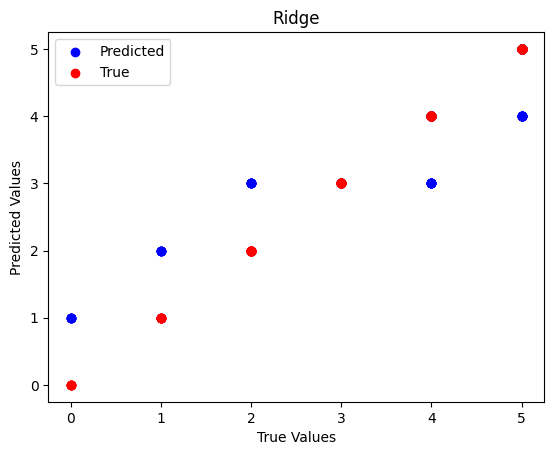

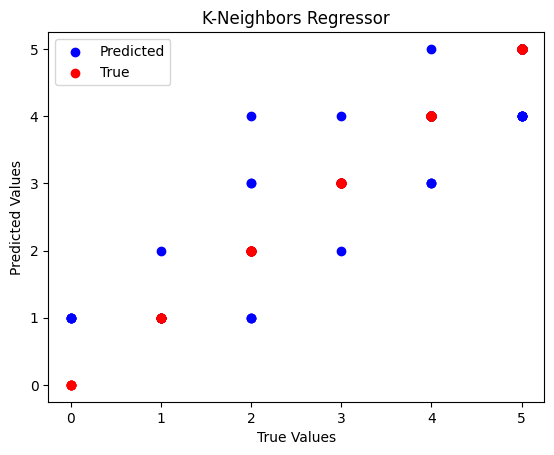

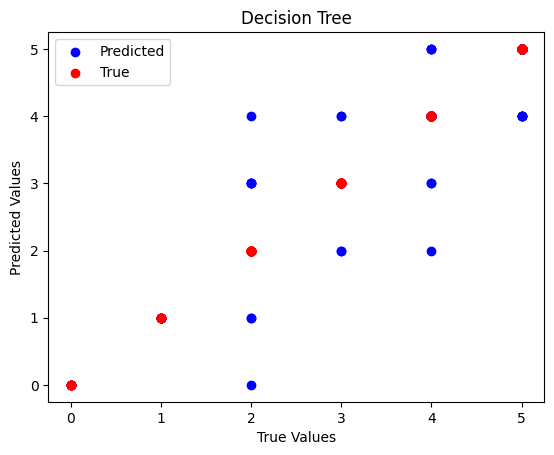

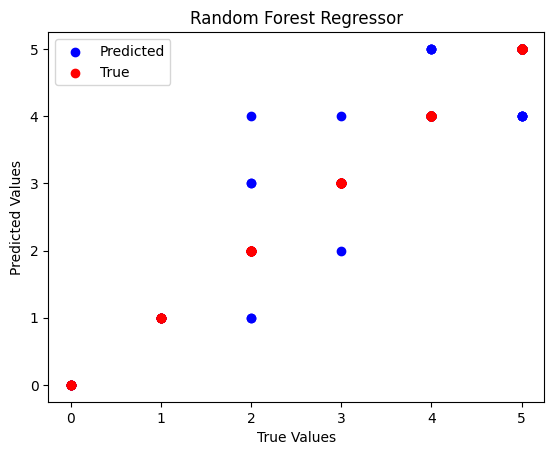

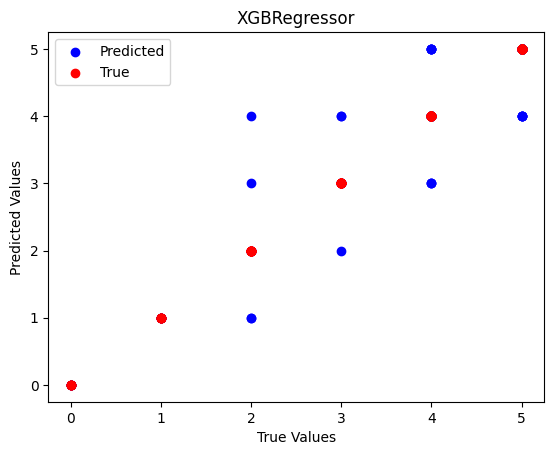

Best model: Random Forest Regressor
Best model results: [0.12666666666666668, 0.9321121459707963, 0.03777777777777777]


In [37]:
models = {
    "Linear Regression": LinearRegression(),
    "Lasso": Lasso(),
    "Ridge": Ridge(),
    "K-Neighbors Regressor": KNeighborsRegressor(),
    "Decision Tree": DecisionTreeRegressor(),
    "Random Forest Regressor": RandomForestRegressor(),
    "XGBRegressor": XGBRegressor()
    
}

model_results = {
    
}

for name, model in models.items():
    
    model.fit(X_train,Y_train)
    prediction = model.predict(X_test)
    prediction = np.clip(np.round(prediction).astype(int),a_min=0,a_max=5)
    mse = mean_squared_error(Y_test,prediction)
    r2  = r2_score(Y_test,prediction)
    mape = mean_absolute_percentage_error(Y_test,prediction)
    model_results[name]=[mse,r2,mape]
    
    # Create a scatter plot with different colors for true and predicted values
    plt.scatter(Y_test, prediction, c='blue', label='Predicted')
    plt.scatter(Y_test, Y_test, c='red', label='True')
    
       
    plt.xlabel('True Values')
    plt.ylabel('Predicted Values')
    plt.title(name)
    plt.legend()
    plt.show()
 
best_model = min(model_results, key=lambda x: model_results[x][0])
print(f'Best model: {best_model}')
print(f'Best model results: {model_results[best_model]}')